In [47]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import ggplot as gg
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
!pwd

/Users/szalmaf/Documents/GitHub/Kaggle Competitions/Sberbank_Russian_Housing_Market


## Read in data

In [51]:
data = pd.read_csv("data/train.csv")
data = data[data["full_sq"] < 250]
#data = data[data["sub_area"] == "Nekrasovka"]
dataset = data.values
X = data["full_sq"].values.reshape(-1,1)
Y = data["price_doc"].values.reshape(-1,1)
Ylog = np.log(Y)

In [97]:
test_data = pd.read_csv("data/test.csv")
X_test = test_data["full_sq"].values.reshape(-1,1)

## Linear regression

In [57]:
linReg = linear_model.LinearRegression()

In [58]:
X = data["full_sq"].values.reshape(-1,1)
Y = np.log(data["price_doc"].values.reshape(-1,1))
T = data["timestamp"].values.reshape(-1,1)

In [59]:
linReg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
linReg.intercept_, linReg.coef_

(array([ 14.78820459]), array([[ 0.01217654]]))

## Scatter plot

In [65]:
plt.scatter(X, Y, c=range(len(X)))

In [66]:
plt.colorbar()

In [67]:
plt.plot(X, linReg.predict(X), color="blue")

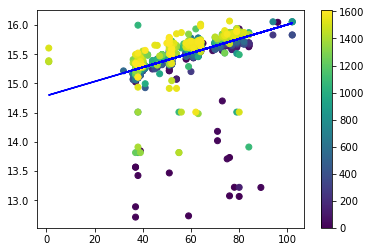

In [68]:
plt.show()

In [69]:
linReg.predict(X)

array([[ 15.26308961],
       [ 15.76232772],
       [ 15.23873653],
       ..., 
       [ 15.23873653],
       [ 15.25091307],
       [ 15.40920808]])

In [72]:
plt.hist(Y, bins=20)

(array([   2.,    1.,    2.,    3.,    2.,    3.,    7.,    3.,    1.,
           0.,    8.,    1.,    0.,    8.,  198.,  356.,  293.,  490.,
         217.,   14.]),
 array([ 12.71127449,  12.87905088,  13.04682727,  13.21460367,
         13.38238006,  13.55015645,  13.71793285,  13.88570924,
         14.05348563,  14.22126203,  14.38903842,  14.55681481,
         14.72459121,  14.8923676 ,  15.060144  ,  15.22792039,
         15.39569678,  15.56347318,  15.73124957,  15.89902596,  16.06680236]),
 <a list of 20 Patch objects>)

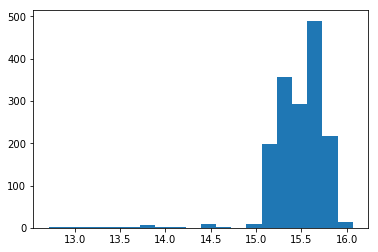

In [73]:
plt.show()

In [51]:
X[]

3527    5326
Name: full_sq, dtype: int64

In [64]:
data["sub_area"].value_counts()

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
Mitino                             679
Tverskoe                           678
Krjukovo                           518
Mar'ino                            508
Poselenie Filimonkovskoe           496
Juzhnoe Butovo                     451
Poselenie Shherbinka               443
Solncevo                           421
Zapadnoe Degunino                  410
Poselenie Desjonovskoe             362
Otradnoe                           353
Nagatinskij Zaton                  327
Nagornoe                           305
Bogorodskoe                        305
Strogino                           301
Izmajlovo                          300
Tekstil'shhiki                     298
Ljublino                           297
Gol'janovo                         295
Severnoe Tushino                   282
Chertanovo Juzhnoe       

In [65]:
data[data["full_sq"] > 250]["sub_area"]

128              Ivanovskoe
1307                Kurkino
1478               Solncevo
1610               Ljublino
2425         Filevskij Park
2780     Troparevo-Nikulino
3596             Nekrasovka
5944              Lianozovo
7207       Vyhino-Zhulebino
16743          Obruchevskoe
18341            Nekrasovka
18525              Shhukino
22785              Tverskoe
23715              Krjukovo
27793        Filevskij Park
Name: sub_area, dtype: object

In [11]:
X = data["num_room"].values.reshape(-1,1)
Y = np.log(data["price_doc"].values.reshape(-1,1))

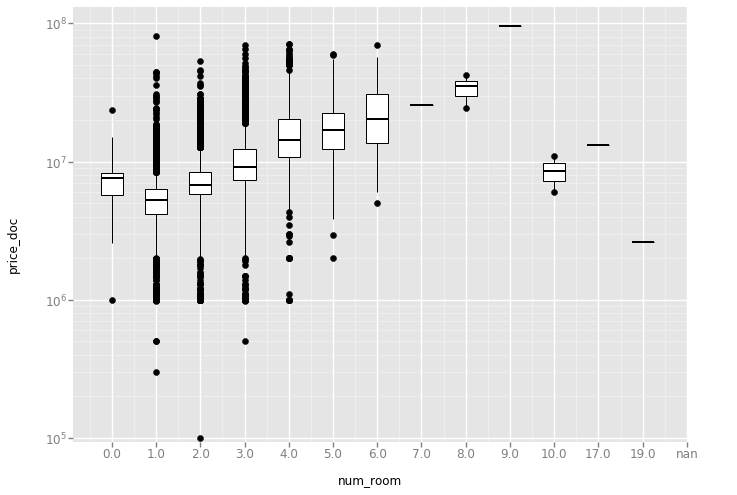

<ggplot: (-9223372036579560886)>

In [17]:
gg.ggplot(gg.aes(x="num_room", y = "price_doc"), data=data) + gg.geom_boxplot() + gg.scale_y_log()

## Keras linear regression

In [54]:
1 input -> 1 output
def simple_linear_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [91]:
seed =42
np.random.seed(seed)
estimator = KerasRegressor(build_fn=simple_linear_regression_model, nb_epoch=80, batch_size=64)

In [86]:
kfold = KFold(n_splits=5, random_state=seed)
res = cross_val_score(estimator, X, Ylog, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (res.mean(), res.std()))

Epoch 1/160
24364/24364 [==============================] - 0s - loss: 949.6038      
Epoch 2/160
24364/24364 [==============================] - 0s - loss: 235.0109     
Epoch 3/160
24364/24364 [==============================] - 0s - loss: 53.9374     
Epoch 4/160
24364/24364 [==============================] - 0s - loss: 27.8677     

In [73]:
res # nb_epoch=10

array([ 26.80576768,  20.4454007 ,  22.33675675,  31.56642481,  22.65416494])

In [78]:
res # nb_epoch=20

array([ 18.01843759,  18.49882635,  20.86528191,  11.59588023,  23.53161804])

In [81]:
res # nb_epoch=40

array([ 3.42974012,  5.42459092,  5.88679233,  2.84023225,  1.1725544 ])

In [84]:
res # nb_epoch=80

array([ 0.40319873,  0.23039031,  0.27046093,  0.2701053 ,  0.25361515])

In [87]:
res # nb_epoch=160

array([ 0.39977254,  0.22967566,  0.277854  ,  0.26737518,  0.25271767])

In [89]:
type(estimator)

keras.wrappers.scikit_learn.KerasRegressor

In [92]:
estimator.fit(X, Ylog)

Epoch 1/80
30455/30455 [==============================] - 0s - loss: 824.8658      
Epoch 2/80
30455/30455 [==============================] - 0s - loss: 137.4222     
Epoch 3/80
30455/30455 [==============================] - 0s - loss: 33.1548     

In [93]:
model = simple_linear_regression_model()

In [94]:
model.fit(X, Ylog, batch_size=64, nb_epoch=80)

Epoch 1/80
30455/30455 [==============================] - 0s - loss: 9652.9932      
Epoch 2/80
30455/30455 [==============================] - 0s - loss: 5453.1844     
Epoch 3/80
30455/30455 [==============================] - 0s - loss: 2800.5343     

In [129]:
a = model.get_weights()[1][0]; b = model.get_weights()[0][0][0]

In [130]:
a,b

(14.854115, 0.014001963)

In [101]:
predLog = model.predict(X_test)

In [133]:
pred = np.exp(predLog)

In [135]:
pred.size

7662

In [115]:
pred.flatten()

array([ 4877738.5,  8563940. ,  4981268. , ...,  5021888. ,  4599158.5,
        6825932. ], dtype=float32)

In [158]:
submit = pd.DataFrame()
submit['id'] = test_data["id"][:7662]
submit['price_doc'] = pred.flatten()
submit

,id,price_doc
0,30474,4877738.50
1,30475,8563940.00
2,30476,4981268.00
3,30477,6806839.50
4,30478,4946516.50
5,30479,5566240.00
6,30480,4864095.50
7,30481,5165950.50
8,30482,5335025.50
9,30483,5180440.00


In [159]:
submit.to_csv("data/" + "simple_linear_regression.csv", index=False)